In [0]:
#=======================
# Seguimiento Integracion por Monte Carlo
# Estudiante: Ana Cristina Molina
#=======================

In [0]:
#LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from random import random

In [0]:
#===============
# Funciones 1D
#===============

f1_1d = lambda x: x**(-3) #1
f2_1d = lambda x: x**(-1/2) #2

In [0]:
#================
# Monte Carlo Integration 1D
#================

N = [100, 1000, 10000]

def MC(MyF, a, b):
  E = [(1/j)*sum([MyF((b-a)*random() + a) for i in range(0, j)]) for j in N]
  S2 = [((b-a)/N[j])*sum([MyF((b-a)*random() + a)**2 - E[j]**2 for i in range(0, N[j])]) for j in range(len(N))]
  E_ = [(b-a)*i for i in E]
  return E_, S2

#============
# Intervalos
#============

int_x= [1, 10] 
Q_N = N[2]/2

In [0]:
#FUNCION 1, 1D

E1_1D, S21_1D = MC(f1_1d, *int_x)
E1_1D_Q, S21_1D_Q = quad(f1_1d, *int_x)

Text(0, 0.5, '$S^2$')

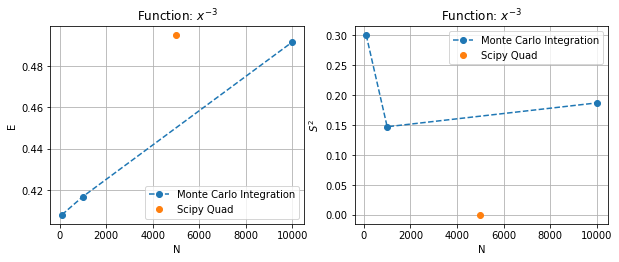

In [286]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title(r'Function: $x^{-3}$')
plt.plot(N, E1_1D, 'o--', label = 'Monte Carlo Integration')
plt.plot(Q_N, E1_1D_Q, 'o', label = 'Scipy Quad')
plt.grid()
plt.legend()
plt.xlabel('N')
plt.ylabel('E')

plt.subplot(2, 2, 2)
plt.title(r'Function: $x^{-3}$')
plt.plot(N, S21_1D, 'o--', label = 'Monte Carlo Integration')
plt.plot(Q_N, S21_1D_Q, 'o', label = 'Scipy Quad')
plt.grid()
plt.legend()
plt.xlabel('N')
plt.ylabel(r'$S^2$')

In [0]:
#=============
# Muestreo ponderado
#=============

#PDF 
B=10
A=1
pdf_uni = lambda x: 1/(B-A) #Uniform distribution

def MC_MP(MyF, pdf, a, b):
  E = [0.0]*3
  for j in range(len(N)):
    for i in range(0, N[j]):
      xm = (b-a)*random() + a
      E[j]+= MyF(xm)/pdf(xm)
    E[j] = E[j]/N[j]

  S2 = [0.0]*3
  for j in range(len(N)):
    for i in range(0, N[j]):
      xm = (b-a)*random() + a
      S2[j] += (MyF(xm)/(pdf(xm)))**2 - E[j]**2
    S2[j] = S2[j]/N[j]

  return E, S2

In [0]:
MP_1 = MC_MP(f1_1d, pdf_uni, 1, 10)

In [0]:
#=============
# Muestreo estratificado
#=============

def MC_ME(MyF, a, b, n):
  E = [0.0]*3
  dn = (b-a)/n
  intervals = []
  xi=a
  for i in range(0, n):
    intervals.append([xi, xi+dn-0.01])
    xi=xi+dn
  
  Dn_DATA = [int(i/len(intervals)) for i in N] 

  for t in range(len(N)):
    E_j = [0.0]*n
    j=0
    for i in intervals:
      for k in range(0, Dn_DATA[t]):
        xm = (i[1]-i[0])*random() + i[0]
        E_j[j]+= MyF(xm)
      E_j[j]=(i[1]-i[0])*E_j[j]/Dn_DATA[t]
      j+=1
    E[t]=sum(E_j)

  return E

In [0]:
ME_1 = MC_ME(f1_1d, 1, 10, 10)

Text(0, 0.5, '$S^2$')

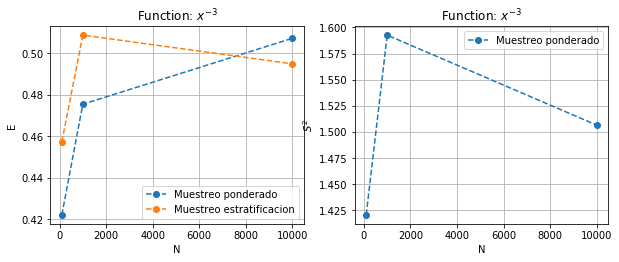

In [291]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title(r'Function: $x^{-3}$')
plt.plot(N, MP_1[0], 'o--', label = 'Muestreo ponderado')
plt.plot(N, ME_1, 'o--', label = 'Muestreo estratificacion')
plt.grid()
plt.legend()
plt.xlabel('N')
plt.ylabel('E')

plt.subplot(2, 2, 2)
plt.title(r'Function: $x^{-3}$')
plt.plot(N, MP_1[1], 'o--', label = 'Muestreo ponderado')
plt.grid()
plt.legend()
plt.xlabel('N')
plt.ylabel(r'$S^2$')

In [0]:
#FUNCION 2, 1D

E2_1D, S22_1D = MC(f2_1d, *int_x)
E2_1D_Q, S22_1D_Q = quad(f2_1d, *int_x)

Text(0, 0.5, '$S^2$')

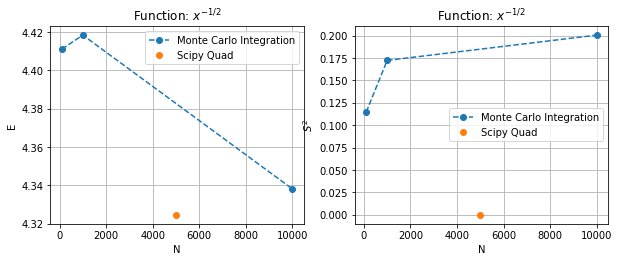

In [293]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title(r'Function: $x^{-1/2}$')
plt.plot(N, E2_1D, 'o--', label = 'Monte Carlo Integration')
plt.plot(Q_N, E2_1D_Q, 'o', label = 'Scipy Quad')
plt.grid()
plt.legend()
plt.xlabel('N')
plt.ylabel('E')

plt.subplot(2, 2, 2)
plt.title(r'Function: $x^{-1/2}$')
plt.plot(N, S22_1D, 'o--', label = 'Monte Carlo Integration')
plt.plot(Q_N, S22_1D_Q, 'o', label = 'Scipy Quad')
plt.grid()
plt.legend()
plt.xlabel('N')
plt.ylabel(r'$S^2$')

In [0]:
MP_2 = MC_MP(f2_1d, pdf_uni, 1, 10)
ME_2 = MC_ME(f2_1d, 1, 10, 10)

Text(0, 0.5, '$S^2$')

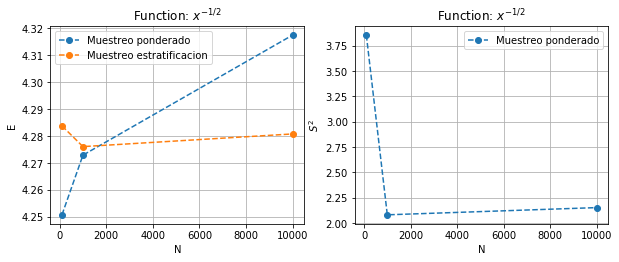

In [295]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title(r'Function: $x^{-1/2}$')
plt.plot(N, MP_2[0], 'o--', label = 'Muestreo ponderado')
plt.plot(N, ME_2, 'o--', label = 'Muestreo estratificacion')
plt.grid()
plt.legend()
plt.xlabel('N')
plt.ylabel('E')

plt.subplot(2, 2, 2)
plt.title(r'Function: $x^{-1/2}$')
plt.plot(N, MP_2[1], 'o--', label = 'Muestreo ponderado')
plt.grid()
plt.legend()
plt.xlabel('N')
plt.ylabel(r'$S^2$')

In [0]:
#===============
#Funciones 3D
#===============

f_3d = lambda x, y, z: 1/x + y + z**2

In [0]:
#================
# Monte Carlo Integration 3D
#================

N = [5, 10, 22]

def MC_3D(MyF, i_x, i_y, i_z):
  E = [0.0]*3
  for i in range(len(N)):
    for xj in range(N[i]):
      xm = (i_x[-1]-i_x[0])*random() + i_x[0]
      for yj in range(N[i]):
        ym = (i_y[-1]-i_y[0])*random() + i_y[0]
        for zj in range(N[i]):
          zm = (i_z[-1]-i_z[0])*random() + i_z[0]
          E[i]+= MyF(xm, ym, zm)
    E[i]=E[i]/N[i]**3

  
  S2 = [0.0]*3
  for i in range(len(N)):
    for xj in range(N[i]):
      xm = (i_x[1]-i_x[0])*random() + i_x[0]
      for yj in range(N[i]):
        ym = (i_y[1]-i_y[0])*random() + i_y[0]
        for zj in range(N[i]):
          zm = (i_z[1]-i_z[0])*random() + i_z[0]
          S2[i]+= MyF(xm, ym, zm)**2 - E[i]**2
          #print(MyF(xm, ym, zm)**2, E[i]**2)
    S2[i]=S2[i]/N[i]**3

  E_ = [(i_x[1]-i_x[0])*(i_y[1]-i_y[0])*(i_z[1]-i_z[0])*i for i in E]
  S2_ = [(i_x[1]-i_x[0])*(i_y[1]-i_y[0])*(i_z[1]-i_z[0])*i for i in S2]
    
  return E_, S2, N

#============
# Intervalos
#============

int_x= [1, 10]
int_y= [0, 2]
int_z= [0, 2] 

In [0]:
MC1_3D = MC_3D(f_3d, int_x, int_y, int_z)

Text(0, 0.5, '$S^2$')

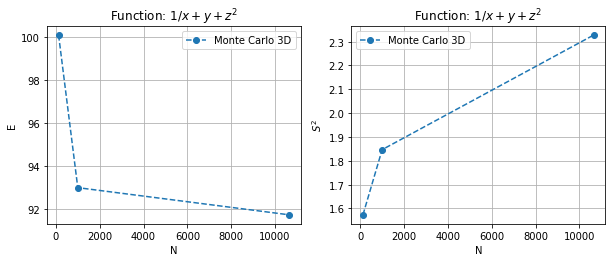

In [314]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title(r'Function: $1/x + y + z^2$')
plt.plot(np.array(MC1_3D[2])**3, MC1_3D[0], 'o--', label = 'Monte Carlo 3D')
plt.grid()
plt.legend()
plt.xlabel('N')
plt.ylabel('E')

plt.subplot(2, 2, 2)
plt.title(r'Function: $1/x + y + z^2$')
plt.plot(np.array(MC1_3D[2])**3, MC1_3D[1], 'o--', label = "Monte Carlo 3D")
plt.grid()
plt.legend()
plt.xlabel('N')
plt.ylabel(r'$S^2$')

In [0]:
#============
# ALGORITMO DE METROPOLIS
#============

sigma = 0.1
pdf_ER = lambda x: (1/((2*np.pi)**(0.5)))*np.exp(-((x)**2)/(2*sigma**2))
dS = lambda x0, xp, pdf: -np.log(pdf(xp)/pdf(x0))
inter =  [-np.pi, np.pi]
theta = lambda : (inter[-1]-inter[0])*random() + inter[0] 

In [0]:
def metro(pdf, inter, N):
  phi = [theta(), ]
  j=0

  while(j<N+1):
    phi_0 = phi[-1]
    phi_p = theta()
    ds0 = dS(phi_0, phi_p, pdf)

    if(ds0<0):
      phi.append(phi_p)
      j=j+1
    else:
      t = random()
      if(t<(pdf(phi_p)/pdf(phi_0))):
        phi.append(phi_p)
      j=j+1
  return phi

In [0]:
Data = metro(pdf_ER, inter, 100000)
bins_ = 100

(-1.5, 1.5)

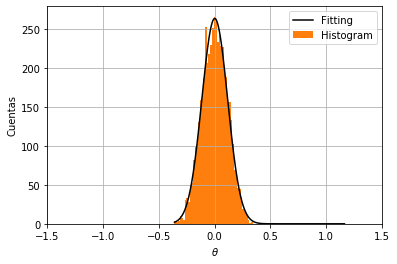

In [309]:
from scipy.stats import norm
import matplotlib.mlab as mlab

xmin, xmax = min(Data), max(Data)
X = np.linspace(xmin, xmax, len(Data))

(m, s) = norm.fit(Data)
pdf_g = norm.pdf(X, m, s)
result = plt.hist(Data, bins=bins_)
scale = len(Data)*(result[1][1]-result[1][0])

plt.hist(Data, bins=bins_, label = 'Histogram')
plt.plot(X, pdf_g*scale, 'k', label = "Fitting")
plt.grid()
plt.legend()
plt.ylabel("Cuentas")
plt.xlabel(r"$\theta$")
plt.xlim(-1.5, 1.5)